# GRIP - Data Science and Business Analytics Internship

## TASK 1

## Prediction using Supervised ML
### Predict the percentage of an student based on the no. of study hours using Simple Linear Regression.


### AUTHOR: Krithika S

### Importing the necessary libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


### Importing Data

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Visualization

Text(0.5, 1.0, 'Hours studied  vs Scores')

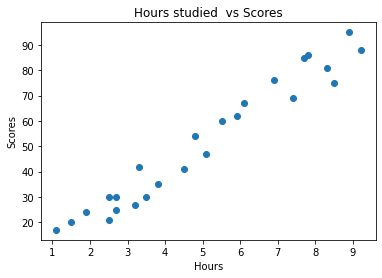

In [94]:
X = df['Hours']
y = df['Scores']

plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.title('Hours studied  vs Scores')

### Preparing data for training

In [95]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

### Training

In [96]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

m = regressor.coef_
b = regressor.intercept_

print("Model parameters:")
print("regression coefficient:",m)
print("regression intercept:",b)

Model parameters:
regression coefficient: [[9.56588997]]
regression intercept: [2.7638016]


### Prediction

In [97]:
y_eq = m * X + b
y_pred = regressor.predict(X_test.reshape(-1,1))


df_predicted = pd.DataFrame(np.concatenate((X_test, y_test, y_pred),axis=1),\
                            columns = ["Test data", "Actual", "Predicted"])
print(df_predicted)

   Test data  Actual  Predicted
0        3.8    35.0  39.114184
1        1.5    20.0  17.112637
2        6.9    76.0  68.768442
3        4.8    54.0  48.680073
4        4.5    41.0  45.810306
5        5.9    62.0  59.202552
6        2.7    30.0  28.591705
7        7.7    85.0  76.421154


### Analysis

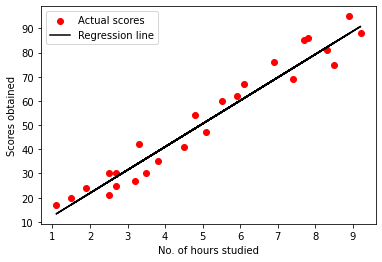

In [98]:
plt.scatter(X, y, color = 'red', label = 'Actual scores')
plt.plot(X,y_eq, color = 'black', label = 'Regression line')
plt.xlabel('No. of hours studied')
plt.ylabel('Scores obtained')
plt.legend()
plt.show()

### predicted score if a student studies for 9.25 hrs/ day

In [99]:
y_ = regressor.predict([[9.25]])
print("Predicted score in a student studies for 9.25 hrs per day is",y_[0][0])

Predicted score in a student studies for 9.25 hrs per day is 91.24828386348256


### Evaluating the model

In [100]:
from sklearn import metrics
import math as m

print("Mean Square Error:",m.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Square Error: 5.152730657593489


In [101]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.643490766702115
